<center><h1 style="font-size: 28px;"><b>Bloc 3 : Analyse prédictive de données structurées par l'intelligence artificielle</b></h1></center>

<h2 style="font-size: 20px;">Utilisation d'un algorithme d'apprentissage automatique supervisé (KNN) pour effectuer une prévision de classification selon des coordonnées géographiques</h2>

***Objectifs de l'algorithme :***

Le but de cet algorithme est de pouvoir effectuer une détermination de taxon d'une observation en fonction des coordonnées géographiques saisies par l'utilisateur ou lisible directement via les métadonnées de l'image uploadées

## 1. Imports des bibliothèques python

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
warnings.filterwarnings('ignore')

## 2. Prétraitement, transformation et visualisation des données




<u>a) Lecture des données générées par le modèle K-Means vu précédement</u>

In [ ]:
df = pd.read_csv('Elan_post_KMEANS.csv')


<u>b) Transformation des données</u>

In [ ]:
# Suppression des lignes vides dans les colonnes latitude, longitude et taxon :
df = df.dropna(subset=['Latitude', 'Longitude', 'KMEANS_classification'])


<u>c) Visualisation des données</u>

In [ ]:
#Visualisation du dataframe
df

,id,Date,Taxon,Latitude,Longitude,stateProvince,scientificName,KMEANS_classification,Categorisation_KMeans
0,120609387,2022-06-06,522193,57.182062,-111.405323,Alberta,Alces alces,0,Elan de l'Ouest
1,120612908,2022-06-06,522193,44.355201,-76.078020,Ontario,Alces alces,1,Elan de l'Est
2,120614734,2020-10-01,522193,53.679080,-112.825853,Alberta,Alces alces,0,Elan de l'Ouest
3,140720175,2022-10-31,522193,51.103251,-114.496485,Alberta,Alces alces,0,Elan de l'Ouest
4,80420033,2021-05-24,522193,48.024882,-89.561867,Ontario,Alces alces,1,Elan de l'Est
...,...,...,...,...,...,...,...,...,...
13475,20055577,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces,0,Elan de l'Ouest
13476,20055578,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces,0,Elan de l'Ouest
13477,20056117,2016-06-17,522193,42.858733,-109.848717,Wyoming,Alces alces,0,Elan de l'Ouest
13478,20073868,2018-09-29,522193,61.086293,-149.648019,Alaska,Alces alces,2,Elan de Yukon


<u>d) Informations sur le dataframe :</u>

In [ ]:
df.count()

id                       13480
Date                     13480
Taxon                    13480
Latitude                 13480
Longitude                13480
stateProvince            13480
scientificName           13480
KMEANS_classification    13480
Categorisation_KMeans    13480
dtype: int64

<u>e) Visualisation graphique des données :</u>

In [ ]:
# Créez une carte en utilisant Plotly Express
fig = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     color='Categorisation_KMeans',
                     scope= 'north america',
                     title='Carte des points en fonction de la classification KMEANS')

# Mise en page pour centrer le titre
fig.update_layout(title_text='Carte des points en fonction de la classification KMEANS', title_x=0.5)

# Mise en page pour déplacer la légende en bas à gauche
fig.update_layout(legend=dict(x=0, y=0, traceorder='normal', orientation='h'))

# Mise en page pour définir la taille de la figure
fig.update_layout(height=600, width=700)

fig.show()

## 3. Préparation des données pour le modèle

<u>a) Détermination des features (X - df_data) et target (Y - df_target)</u>


In [ ]:
df_data = df[["Latitude", "Longitude"]]
df_target = df[["KMEANS_classification"]].values.ravel()


<u>b) Split des données en données d'entraînement et données de test</u>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

In [ ]:
#visualisation du du dataframe
df.head()

,id,Date,Taxon,Latitude,Longitude,stateProvince,scientificName,KMEANS_classification,Categorisation_KMeans
0,120609387,2022-06-06,522193,57.182062,-111.405323,Alberta,Alces alces,0,Elan de l'Ouest
1,120612908,2022-06-06,522193,44.355201,-76.078020,Ontario,Alces alces,1,Elan de l'Est
2,120614734,2020-10-01,522193,53.679080,-112.825853,Alberta,Alces alces,0,Elan de l'Ouest
3,140720175,2022-10-31,522193,51.103251,-114.496485,Alberta,Alces alces,0,Elan de l'Ouest
4,80420033,2021-05-24,522193,48.024882,-89.561867,Ontario,Alces alces,1,Elan de l'Est


<u>c) Normalisation de la donnée</u>

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Initialisation du modèle

In [ ]:
#Initialisation du modèle
knn = KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

## 5. Entrainement du modèle

In [ ]:
#Entrainement du modèle
knn.fit(X_train, y_train)

## 6. Prédiction du Modèle
Le modèle est utiliser pour effectuer un prédiction de classification d'une future observation d'un utilisation, le but est de pouvoir déterminer un taxon sur la famille ALCES en fonction des données de géolocalisation fourni par l'utilisateur ou les métadonnées de la photo.

<u>a) Prédiction des valeurs sur l'ensemble de test et évaluation de la précision du modèle : </u>

In [ ]:
# Prédiction des valeurs sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

print("Exactitude (Accuracy) : {:.2f}%".format(accuracy * 100))

Exactitude (Accuracy) : 99.85%


In [ ]:
print('Précision sur le sous-ensemble entraînement': {:.3f}'.format(knn.score(X_train, y_train)))
print('Précision sur le sous-ensemble test: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.999


<u>b) Autres mesures de l'efficacité du modèle :</u>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Matrice de confusion :
[[1292    0    2]
 [   1  976    0]
 [   1    0  424]]
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       977
           2       1.00      1.00      1.00       425

    accuracy                           1.00      2696
   macro avg       1.00      1.00      1.00      2696
weighted avg       1.00      1.00      1.00      2696



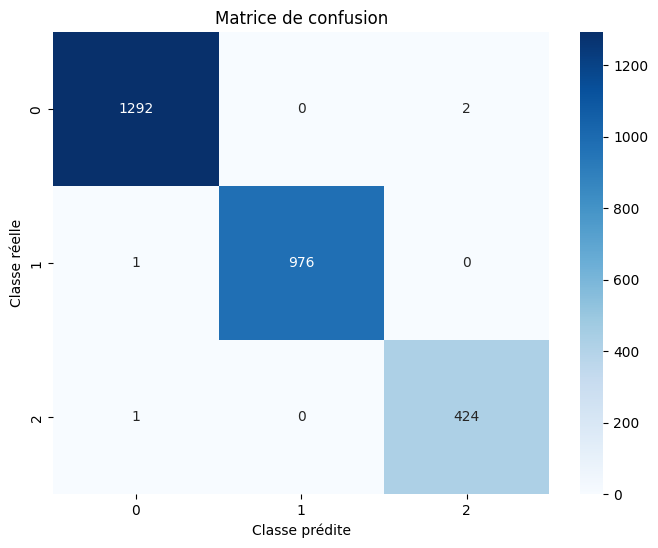

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()

Le modèle semble être très performant. La précision est proche de 100%, toutes les données ont été bien classées.

## 6. Test du modèle avec la simulation de 10 observations
Nous allons utiliser le modèle entraîné pour faire des prédictions. Nous avons pris des points au hasard dans chacune des zones, tels que pourrait l'être des vraies observations géolocalisées :

In [ ]:

#Ouest (0)
pointO1 = [[44.3418518689, -106.9592642784]]
pointO2 = [[43.64484105, -110.7586348]]
pointO3 = [[41.40467, -111.5989533333]]
pointO4 = [[45.8956195423, -114.1846745811]]


#Est (1)
pointE1 = [[43.67827, -72.444245]]
pointE2 = [[44.7716296871, -71.7707204819]]
pointE3 = [[44.3463833333, -68.0631638333]]

#Yukon (2)

pointY1 = [[61.1965439729, -149.9702453613]]
pointY2 = [[60.5690057626, -151.1912727356]]
pointY3 = [[63.731164, -148.917747]]




Représentation des points de ces deux zones sur une carte :

- Bleu : Points existants d'observations de d'Elans l'Ouest
- Rouge : Points existants d'observations de d'Elan de l'Est
- Vert : Points existants d'observations de d'Elan de Yukon
- Orange : Points pris au hasard dans cette zone géographique Ouest
- Noir : Points pris au hasard dans cette zone géographique Est
- Gris : Points pris au hasard dans cette zone géographique Nord Ouest

In [ ]:
fig_postreglog = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     color='Categorisation_KMeans',
                     center={'lat': 5, 'lon': 20},
                     title='Carte des points en fonction de la classification KMEANS')

fig_postreglog.add_trace(go.Scattergeo(lat=[pointO1[0][0]],lon=[pointO1[0][1]], mode='markers', marker=dict(color='ORANGE'), name='pointO1'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO2[0][0]],lon=[pointO2[0][1]], mode='markers', marker=dict(color='ORANGE'), name='pointO2'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO3[0][0]],lon=[pointO3[0][1]], mode='markers', marker=dict(color='ORANGE'), name='pointO3'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO4[0][0]],lon=[pointO4[0][1]], mode='markers', marker=dict(color='ORANGE'), name='pointO4'))


fig_postreglog.add_trace(go.Scattergeo(lat=[pointE1[0][0]],lon=[pointE1[0][1]], mode='markers', marker=dict(color='BLACK'), name='pointE1'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE2[0][0]],lon=[pointE2[0][1]], mode='markers', marker=dict(color='BLACK'), name='pointE2'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE3[0][0]],lon=[pointE3[0][1]], mode='markers', marker=dict(color='BLACK'), name='pointE3'))

fig_postreglog.add_trace(go.Scattergeo(lat=[pointY1[0][0]],lon=[pointY1[0][1]], mode='markers', marker=dict(color='GREY'), name='pointY1'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointY2[0][0]],lon=[pointY2[0][1]], mode='markers', marker=dict(color='GREY'), name='pointY2'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointY3[0][0]],lon=[pointY3[0][1]], mode='markers', marker=dict(color='GREY'), name='pointY3'))

fig_postreglog.show()

<u>a) Normalisation de ces points selon le Scaler déjà entraîné sur nos données :</u>

In [ ]:
new_point_scaledO1 = scaler.transform(pointO1)
new_point_scaledO2 = scaler.transform(pointO2)
new_point_scaledO3 = scaler.transform(pointO3)
new_point_scaledO4 = scaler.transform(pointO4)

new_point_scaledE1 = scaler.transform(pointE1)
new_point_scaledE2 = scaler.transform(pointE2)
new_point_scaledE3 = scaler.transform(pointE3)

new_point_scaledY1 = scaler.transform(pointY1)
new_point_scaledY2 = scaler.transform(pointY2)
new_point_scaledY3 = scaler.transform(pointY3)


<u>b) Utilisation du modèle pour prédire la classification :</u>

In [ ]:
predicted_categoryO1 = knn.predict(new_point_scaledO1)
predicted_categoryO2 = knn.predict(new_point_scaledO2)
predicted_categoryO3 = knn.predict(new_point_scaledO3)
predicted_categoryO4 = knn.predict(new_point_scaledO4)


predicted_categoryE1 = knn.predict(new_point_scaledE1)
predicted_categoryE2 = knn.predict(new_point_scaledE2)
predicted_categoryE3 = knn.predict(new_point_scaledE3)

predicted_categoryY1 = knn.predict(new_point_scaledY1)
predicted_categoryY2 = knn.predict(new_point_scaledY2)
predicted_categoryY3 = knn.predict(new_point_scaledY3)


<u>c) Détermination d'une Fonction qui permet d'obtenir le libellé de la catégorie en fonction du code :</u>

In [ ]:
def cat(categorie):
    if categorie == [0]:
        return "Ouest"
    if categorie == [1]:
        return "Est"
    if categorie == [2]:
        return "Yukon"

<u>d) Restitution des catégories prédites avec libellés :</u>

In [ ]:
print("Prédiction de classement du point O1 : ", cat(predicted_categoryO1))
print("Prédiction de classement du point O2 : ", cat(predicted_categoryO2))
print("Prédiction de classement du point O3 : ", cat(predicted_categoryO3))
print("Prédiction de classement du point O4 : ", cat(predicted_categoryO4))

print(" ")

print("Prédiction de classement du point E1 : ", cat(predicted_categoryE1))
print("Prédiction de classement du point E2 : ", cat(predicted_categoryE2))
print("Prédiction de classement du point E3 : ", cat(predicted_categoryE3))

print(" ")

print("Prédiction de classement du point Y1 : ", cat(predicted_categoryY1))
print("Prédiction de classement du point Y2 : ", cat(predicted_categoryY2))
print("Prédiction de classement du point Y3 : ", cat(predicted_categoryY3))

Prédiction de classement du point O1 :  Ouest
Prédiction de classement du point O2 :  Ouest
Prédiction de classement du point O3 :  Ouest
Prédiction de classement du point O4 :  Ouest
 
Prédiction de classement du point E1 :  Est
Prédiction de classement du point E2 :  Est
Prédiction de classement du point E3 :  Est
 
Prédiction de classement du point Y1 :  Yukon
Prédiction de classement du point Y2 :  Yukon
Prédiction de classement du point Y3 :  Yukon
